In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/retail_sales.csv",parse_dates=["date"],index_col=["date"])
df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


In [ ]:
df.isna().sum()

sales    0
dtype: int64

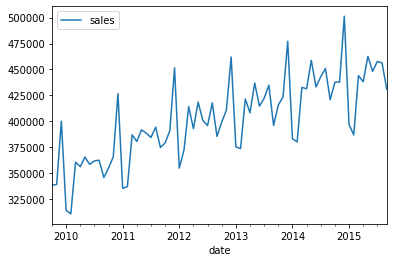

In [ ]:
df.plot()

In [ ]:
#Checking the stationarity of data

In [ ]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df.sales)
p_val = res[1]
if p_val > 0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


In [ ]:
from statsmodels.api import tsa
decomp = tsa.seasonal_decompose(df.sales)

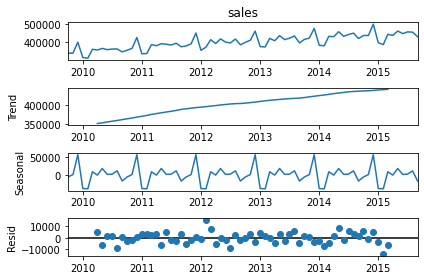

In [ ]:
fig = decomp.plot()

In [ ]:
#For forcasting the values we use auto corelation

In [ ]:
import statsmodels
print(statsmodels.__version__)

0.10.2


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

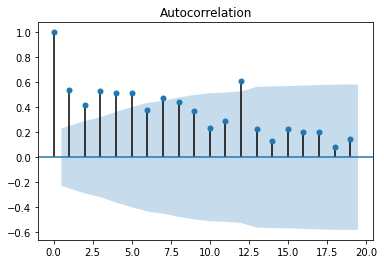

In [ ]:
fig = plot_acf(df.sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


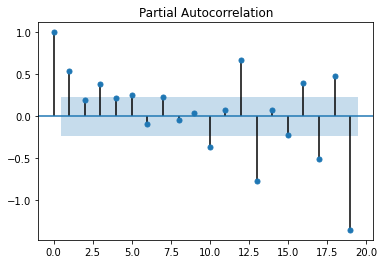

In [ ]:
fig = plot_pacf(df.sales)

##Pandas Auto Corelation Plot

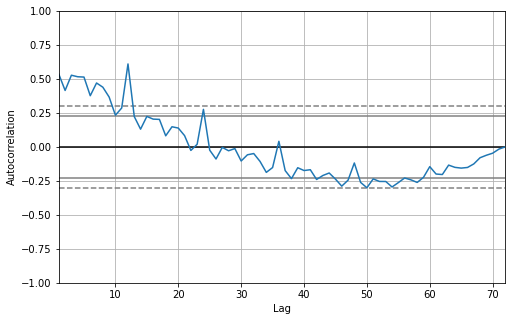

In [ ]:
fig = plt.figure(figsize=(8,5))
pd.plotting.autocorrelation_plot(df.sales)

In [ ]:
from statsmodels.tsa.ar_model import AR
x = df.sales
model = AR(x)
model_fit = model.fit()

In [ ]:
print("Lag value selected by model :",model_fit.k_ar)

Lag value selected by model : 11


In [ ]:
print(model_fit.params)

const        47309.396455
L1.sales        -0.139538
L2.sales        -0.291968
L3.sales         0.133450
L4.sales         0.122387
L5.sales         0.516394
L6.sales         0.229781
L7.sales         0.527528
L8.sales         0.174068
L9.sales         0.141117
L10.sales       -0.340605
L11.sales       -0.168561
dtype: float64


In [ ]:
ypred = model_fit.predict()

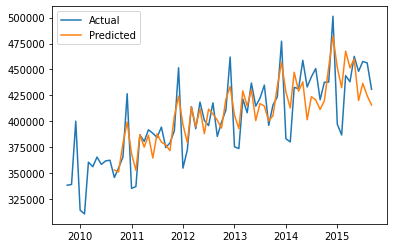

In [ ]:
plt.plot(x,label="Actual")
plt.plot(ypred,label="Predicted")
plt.legend()

In [ ]:
pred = model_fit.predict(start="2015-10-01", end="2016-12-01")
pred

2015-10-01    422623.489515
2015-11-01    460488.527163
2015-12-01    496610.513938
2016-01-01    455858.856345
2016-02-01    439903.788870
2016-03-01    444939.294117
2016-04-01    454000.645105
2016-05-01    461705.144121
2016-06-01    457772.119931
2016-07-01    473660.159559
2016-08-01    470906.330796
2016-09-01    450994.191586
2016-10-01    437718.773455
2016-11-01    457897.827066
2016-12-01    481920.288414
Freq: MS, dtype: float64

In [ ]:
residual = model_fit.resid

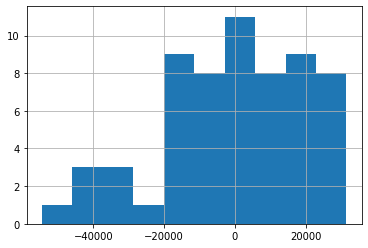

In [ ]:
residual.hist()

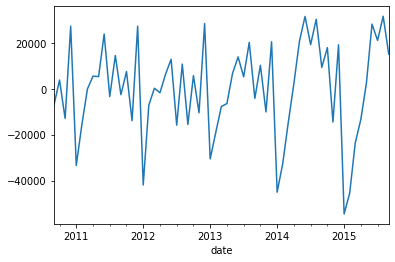

In [ ]:
residual.plot()

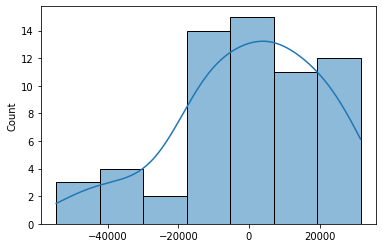

In [ ]:
sns.histplot(residual,kde=True)